In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

In [2]:
data = pd.read_csv('D:/Work/Data_files/working_dir/gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.drop('Activity', axis=1).values
X

array([[0.        , 0.49700901, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.36666667, 0.60629148, 0.05      , ..., 0.        , 1.        ,
        0.        ],
       [0.0333    , 0.48012427, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.52056377, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.7656462 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.53395198, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [4]:
y = data['Activity'].values
y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=241)

In [6]:
sigmoid_func = lambda x: (1 / (1 + np.exp(-x)))

train_losses = []
test_losses = []

learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
n_estimators = 250
for learning_rate in learning_rates:
    clf = GradientBoostingClassifier(learning_rate=learning_rate,
                                     n_estimators=n_estimators,
                                     verbose=0,
                                     random_state=241)
    clf.fit(X_train, y_train)
    train_loss = []
    test_loss = []
    for i in clf.staged_decision_function(X_train):
        train_loss.append(log_loss(y_train, sigmoid_func(i)))
    for i in clf.staged_decision_function(X_test):
        test_loss.append(log_loss(y_test, sigmoid_func(i)))
    train_losses.append(train_loss)
    test_losses.append(test_loss)

In [7]:
# Make DataFrame for analysis of min loss-rate
# by number of estimators and learning rate:

df_estimators_number = [i for i in range(1, n_estimators+1)]*len(learning_rates)
df_train_losses = []
df_test_losses = []
for i in range(len(learning_rates)):
    df_train_losses += train_losses[i]
    df_test_losses += test_losses[i]
df_learning_rates = [learning_rates[0]]*n_estimators +\
    [learning_rates[1]]*n_estimators + [learning_rates[2]]*n_estimators +\
    [learning_rates[3]]*n_estimators + [learning_rates[4]]*n_estimators
results = {'Estimators_number': df_estimators_number,
           'Learning_rate': df_learning_rates,
           'Train_losses': df_train_losses,
           'Test_losses': df_test_losses}
result_losses = pd.DataFrame(results)
result_losses.tail()

,Estimators_number,Learning_rate,Train_losses,Test_losses
1245,246,0.1,0.091868,0.565128
1246,247,0.1,0.091447,0.565994
1247,248,0.1,0.090732,0.566088
1248,249,0.1,0.090157,0.565739
1249,250,0.1,0.089370,0.566343


In [14]:
result_losses.sort_values(['Learning_rate', 'Test_losses'], ascending=True).groupby('Learning_rate').head(2)

,Estimators_number,Learning_rate,Train_losses,Test_losses
1051,52,0.1,0.324463,0.525905
1050,51,0.1,0.327410,0.526031
786,37,0.2,0.271831,0.530165
788,39,0.2,0.266408,0.530402
510,11,0.3,0.385526,0.543284
508,9,0.3,0.408540,0.544022
256,7,0.5,0.377943,0.558426
254,5,0.5,0.419036,0.558673
0,1,1.0,0.509476,0.582294
1,2,1.0,0.459585,0.586915


In [17]:
gb = GradientBoostingClassifier(n_estimators=250,
                                learning_rate=0.2,
                                random_state=241)
gb.fit(X_train, y_train)

test_loss = list()
for i, y_pred in enumerate(gb.staged_decision_function(X_test)):
    y_pred = 1.0 / (1.0 + np.exp(- y_pred))
    test_loss.append([i + 1, log_loss(y_test, y_pred)])
test_loss = pd.DataFrame(test_loss, columns=['iter','loss'])

test_loss[test_loss.loss==test_loss.loss.min()]

,iter,loss
36,37,0.530165


In [15]:
clf = RandomForestClassifier(n_estimators=52, random_state=241)
clf.fit(X_train, y_train)
log_loss(y_test, clf.predict_proba(X_test))

0.5383402553854034

In [16]:
clf = RandomForestClassifier(n_estimators=400, random_state=241)
clf.fit(X_train, y_train)
log_loss(y_test, clf.predict_proba(X_test))

0.524267252003116

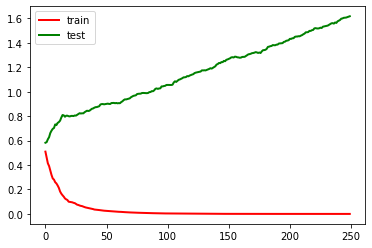

In [29]:
plt.figure()
plt.plot(train_losses[0], 'r', linewidth=2)
plt.plot(test_losses[0], 'g', linewidth=2)
plt.legend(['train', 'test'])

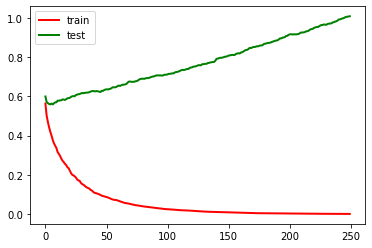

In [30]:
plt.figure()
plt.plot(train_losses[1], 'r', linewidth=2)
plt.plot(test_losses[1], 'g', linewidth=2)
plt.legend(['train', 'test'])

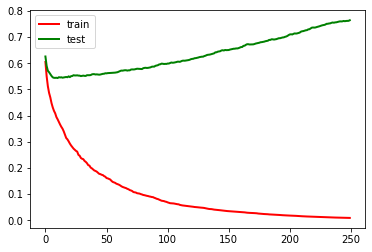

In [31]:
plt.figure()
plt.plot(train_losses[2], 'r', linewidth=2)
plt.plot(test_losses[2], 'g', linewidth=2)
plt.legend(['train', 'test'])

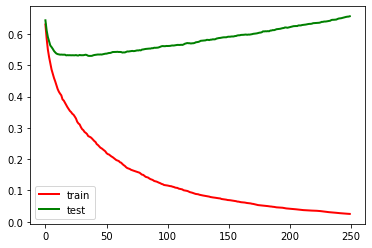

In [32]:
plt.figure()
plt.plot(train_losses[3], 'r', linewidth=2)
plt.plot(test_losses[3], 'g', linewidth=2)
plt.legend(['train', 'test'])

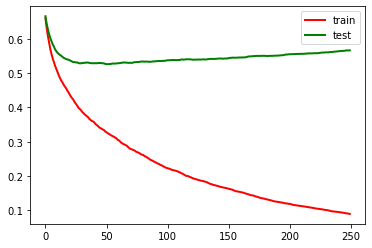

In [33]:
plt.figure()
plt.plot(train_losses[4], 'r', linewidth=2)
plt.plot(test_losses[4], 'g', linewidth=2)
plt.legend(['train', 'test'])